# HW8. Ising model with 2-dimensional spin array

2. 최인접 스핀하고만 상호작용하는 2차원의 이징모델(10x10)을 구현하세요.

1) 2차원 스핀 행렬과 상호작용행렬을 정의하세요 (20점) \\
*주기적인 경계조건: $A_{(x_i=1, y_i)-(x_j=N,y_j)}=1$, $A_{(x_i, y_i=1)-(x_j,y_j=N)}=1$ \\
2) 몬테카를로 계산을 통해 $m=|\sum_iS_i|$ 을 얻어 온도의 함수로 그래프를 그리세요. (40점) \\
*T=0K~4K

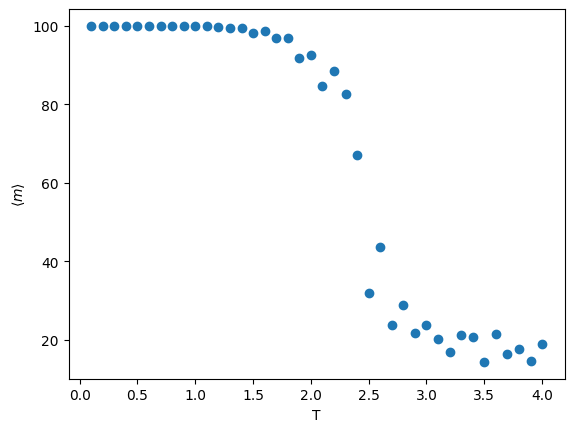

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
T_arr = np.arange(0.1, 4.1, 0.1)
m_arr = []

def spin_matrix(N):
    return np.random.choice([-1, 1], size=(N, N))

def interaction_matrix(N):
    L = N * N
    A = np.zeros((L, L), dtype=int)

    for x in range(N):
        for y in range(N):
            current = x * N + y
            up = ((x - 1) % N) * N + y
            A[current, up] = 1

            down = ((x + 1) % N) * N + y
            A[current, down] = 1

            left = x * N + (y - 1) % N
            A[current, left] = 1

            right = x * N + (y + 1) % N
            A[current, right] = 1

    return A

def calE(S, A):
  S_flat = S.flatten()
  return -0.5*S_flat @ A @ S_flat.T

iteration = 10000
def MC(S, A, T):
  Snew = np.copy(S)
  k = np.random.randint(N)
  l = np.random.randint(N)
  Snew[k,l]*=-1
  deltaE = calE(Snew, A) - calE(S, A)
  if deltaE < 0 or np.random.rand()<np.exp(-deltaE/T):
    S=Snew
  return S

A = interaction_matrix(N)

for T in T_arr:
  S = spin_matrix(N)
  #평형화
  for i in range(iteration):
    S = MC(S, A, T)

  m=0
  for i in range(iteration):
    S = MC(S, A, T)
    m += np.abs(np.sum(S))
  m=m/iteration
  m_arr.append(m)

plt.scatter(T_arr, m_arr)
plt.xlabel('T')
plt.ylabel(r'$\langle m \rangle$')
plt.show()

위의 코드는 최인접 스핀하고만 상호작용하는 10x10 크기의 2차원 이징모델을 바탕으로 monte-carlo method를 통해 2차원 스핀 행렬과 상호작용 행렬을 정의한 뒤, 온도에 따른 자화도 m의 값을 그래프로 나타낸 코드이다. 변수 N은 NxN 스핀 행렬의 한변의 길이를 나타내며, 본 문제에서는 10x10 행렬이라 가정하였기에 10으로 가정하였다. 변수 T_arr는 온도를 저장한 리스트로, 문제에서 주어진 대로 0.1부터 4.0의 값을 0.1 간격으로 저장하였다. 변수 m_arr는 온도에 따른 자화도 m을 저장하는 리스트이다. \\
사용자 정의 함수 spin_matrix는 N을 입력받아 NxN 크기의 2차원 스핀 행렬을 반환하는 함수이다. numpy 모듈의 random.choice 명령어를 통해 1 또는 -1의 값을 랜덤하게 갖는 NxN 크기의 행렬을 만든 뒤 반환하였다. \\
사용자 정의 함수 interaction_matrix는 N을 입력받아 상호작용 행렬 A를 생성 후 반환하는 함수이다. L=NxN이라 가정할때 상호작용 행렬 A는 LxL의 크기를 갖는데, 이는 상호작용 행렬 A의 i번째 행이 L개의 전자 중 i번째 전자의 상호작용 행렬을 일차원으로 펼친 형태를 띄기 떄문이다. 즉, A[0]은 0번쨰 전자의 상호작용 행렬, A[1]은 1번째 전자의 상호작용 행렬을 나타낸다. 먼저 LxL 크기의 영행렬을 만든 뒤 이중 for문을 활용하여 상호작용 행렬을 정의하였다. for문 내의 변수 current는 몇번째 전자에 대한 상호작용 행렬을 만들건지를 나타내며, 0에서 99의 숫자를 가진다. 변수 up, down, left, right는 주기적 경계조건에 따른 인접한 스핀의 위치를 나타내는 변수이다. 이때, 예를 들어 변수 up의 x-1의 값이 음수가 나오는 경우에는 주기적 경계조건을 만족시키기 위해 N에 대한 나머지값을 통해 인접한 스핀의 위치를 정하도록 하였다. 이후 인접한 스핀이 위치한 순서의 행렬 값을 1로 바꾸어 100개의 전자에 대한 상호작용 행렬 A를 정의하였다. 이후 상호작용 행렬 A를 반환하였다. \\
사용자 정의 함수 calE는 2차원 스핀 행렬 S와 상호작용 행렬 A를 입력받아 에너지를 계산해주는 함수이다. 변수 S_flat은 2차원 스핀행렬 S를 1차원 리스트로 바꾼 값이며, 이후 $E=-0.5S_{flat}AS_{flat}^T$의 공식을 바탕으로 에너지를 계산하여 그 값을 반환하였다. 변수 iteration은 monte-carlo method의 실행횟수를 나타내는 변수로 10000으로 설정하였다. \\
사용자 정의 함수 MC는 S, A, T를 입력받아 monte-carlo method를 수행하는 함수이다. 변수 Snew는 S를 복제한 뒤 저장하며, 이후 랜덤으로 (k,l)에 위치한 전자의 스핀을 전환시킨다. 변수 deltaE는 Snew에서의 에너지 변화량을 계산하여 저장한다. 이후 if문을 통해 deltaE의 값이 음수이거나(에너지적으로 안정) $e^{\frac{-\Delta E}{T}}$이 랜덤한 값보다 클 경우에는 스핀 배열을 새로운 상태로 업데이트하여 최종적으로 S를 반환한다. \\
변수 A에 사용자 정의 함수 interaction_matrix를 통해 상호작용 행렬을 저장하였으며, for문을 통해 T_arr내의 T값에 따라 10000번의 monte-carlo method를 적용해 스핀 행렬을 평형화 시킨 뒤 추가로 10000번 반복하여 평균적인 자화도 m=$\langle m \rangle$을 구하였다. 이후 m_arr에 m값을 추가하였다. 최종적으로 matplotlib를 통해 x축이 T_arr이고 y축이 m_arr인 그래프를 작성하였다.

3) 자화도 $m$이 생겨나는 상전이 온도 주변에서 자화도 $m=c(T_c-T)^{\alpha}$를 만족한다고 알려져 있습니다. \\
경사하강법을 이용한 곡선 맞춤으로 상전이 온도 (critical temperature,$T_c$) 와 $\alpha$를 구해보세요. [40pts] \\
*Tc근처의 T<Tc에서만 피팅하면 됩니다.

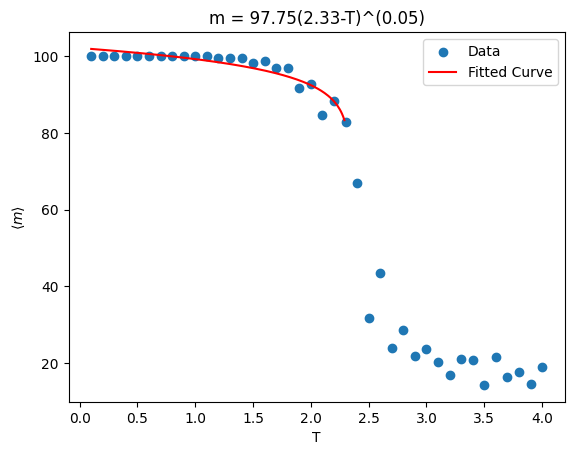

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1.0E-6
c = 0.000001
vars = [100, 2.5, 1]
dvars = [0.001, 0.001, 0.001]
delta_vars = [0.001, 0.001, 0.001]

def f(vars, T):
    return vars[0] * (vars[1] - T)**vars[2]

def gradient(f, vars, dvars, delta_vars, T_arr, m_arr):
    n = len(vars)
    delta_var = np.array(delta_vars)

    while np.any(np.abs(delta_var) > eps):
        valid = T_arr < vars[1]
        T = T_arr[valid]
        m_arr1 = np.array(m_arr)
        m = m_arr1[valid]
        for i in range(n):
          delta_var[i] = np.sum((f(vars,T)-m)*(f(vars+dvars[i]*np.eye(n)[i], T)-f(vars, T))/dvars[i])
        vars -= c*delta_var

    return vars, T

real_vars, T_lim = gradient(f, vars, dvars, delta_vars, T_arr, m_arr)

r = np.arange(min(T_lim), max(T_lim), 0.01)

plt.scatter(T_arr, m_arr, label='Data')
plt.plot(r, f(real_vars, r), label='Fitted Curve', color='red')
plt.xlabel('T')
plt.ylabel(r'$\langle m \rangle$')
plt.legend()
plt.title(r'm = {:.2f}({:.2f}-T)^({:.2f})'.format(real_vars[0], real_vars[1], real_vars[2]))
plt.show()


위의 코드는 1,2번에서 구한 m-T 그래프에 대해 경사하강법을 이용해 curve fitting을 적용하여 원데이터와 fitted curve를 함께 나타낸 뒤, $m=c(T_c-T)^{\alpha}$ 공식의 $c, T_c, \alpha$값을 구하는 코드이다. \\
변수 eps는 경사하강법의 오차범위를 나타내는 변수로 1.0E-6로 설정하였으며, 변수 c는 조절변수를 업데이트할 때 변수의 조절정도를 나타내는 변수로 0.000001로 설정하였다. 리스트 vars, dvars, delta_vars는 각각 구하고자하는 변수 $c$, $T_c$, $\alpha$의 초깃값, 편미분시 사용되는 값, 변수의 갱신을 위해 사용되는 값(편미분값)을 담은 리스트이다. vars의 초깃값은 각각 100, 2.5, 1로 설정하였으며, dvars의 초깃값은 세 변수 다 0.001, delta_vars의 초깃값은 세 변수 다 0.001로 설정하였다. \\
사용자 정의함수 f(vars, T)는 구하려고 하는 변수의 리스트인 vars와 T값을 입력받아 변수와 T로 구성된 함숫값을 반환한다. 본 코드에서 vars[0]은 $c$, vars[1]은 $T_c$, vars[2]는 $\alpha$를 의미하며, 최종적으로 $c(T_c-T)^{\alpha}$의 값을 반환한다. \\
사용자 정의함수 gradient는 함수 f, vars, dvars, delta_vars, T_arr, m_arr를 입력받아 delta_vars의 값들이 eps보다 작아질 때 까지 경사하강법을 적용한 뒤, 업데이트된 변수를 반환하는 함수이다. 변수 n은 리스트 vars의 길이를 나타내며, 조절변수의 개수를 의미한다. while문 내의 변수 valid는 함숫값 $c(T_c-T)^{\alpha}$이 복소수가 되지않도록 $T<T_c$인 영역에 대해서만 경사하강법을 적용하도록 범위를 제한한다. 변수 T는 valid에 의해 제한된 영역의 T_arr, 변수 m은 valid에 의해 제한된 영역의 m_arr를 의미한다.


```
for i in range(n):
  delta_var[i] = np.sum((f(vars,T)-m)*(f(vars+dvars[i]*np.eye(n)[i], T)-f(vars, T))/dvars[i])
vars -= c*delta_var
```
부분은 경사하강법의 $$\dfrac{\partial E}{\partial a_i} = -2\sum^N_{n=1}[y_n-f(x_n;\vec{a})]\dfrac{\partial f(x_n;\vec{a})}{\partial a_i}$$ 과정과 $$a_i \rightarrow a_i-c\dfrac{\partial E}{\partial a_i}$$ 과정을 나타낸다. delta_vars의 어떤 원소가 eps보다 오차가 적어지면 while문이 끝나며, 이후 업데이트된 변수 vars와 $T<T_C$영역의 온도 리스트 T를 반환한다. \\
이후 변수 real_vars와 T_lim에 gradient(f, vars, dvars, delta_vars, T_arr, m_arr)값을 저장하였다. 변수 r은 T_lim의 최솟값과 최댓값을 0.01간격으로 나누어 저장한 리스트이다. 이후 x축이 T_arr이고 y축이 m_arr인 산포도(파란색)와 x축이 r이고 y축이 f(real_vars, r)인 fitted curve(빨간색)를 한 그래프에 나타내었다. 위 과정을 통해 구한 각 변수의 값은 $c=97.75$, $T_c = 2.33$, $\alpha = 0.05$이다.